# Sistemas Inteligentes

## Exercício Computacional 1 - Classificação

Neste laboratório serão explorados os classificadores **KNN** e **Decision Tree**. Também vamos explorar a métrica de **Acurácia** e conhecer a **Confusion Matrix**.

### Identificação do Aluno

#### Nome Completo

 William de Souza Gomes

#### RA

11201720874

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [1]:
import sklearn as sk 
from sklearn import datasets
digits_dataset = datasets.load_digits()

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

In [2]:
digits_img = digits_dataset.images

Verifique o formato de **digits_img**.

In [3]:
digits_img.shape

(1797, 8, 8)

Imprima **digits_img** para que seja possível ver como são os dados que temos no momento.

In [4]:
digits_img

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

Sabendo que esta estrutura se refere a um conjunto de imagens, pode ser interessante imprimir ao menos uma ou duas para visualizarmos como é o seu padrão.

Para fazer isso, importe o pacote de funções **pyplot** da biblioteca **matplotlib**. Apesar de não ser obrigatório, para facilitar, recomenda-se utilizar um "apelido" para esse tipo de pacote com nome tão grande, a fim de tornar o seu uso mais prático. É comum utilizar o termo "plt" para o pyplot, mas você pode chamar como preferir.

In [5]:
import matplotlib.pyplot as plt

Depois de importar o pacote, utilize a função **imshow()** do **pyplot** para imprimir na tela uma das imagens contidas em **digits_img**.

Obs: caso tenha sido utilizado um apelido na importação do pacote, lembre-se dele quando for chamar suas funções, como é o caso agora.

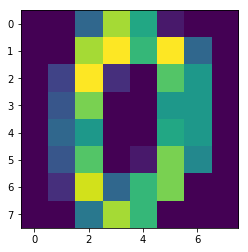

In [6]:
im1 = plt.imshow(digits_img[0])

Apesar de esse tipo de formato permitir que essas imagens sejam elegantemente exibidas a nós, humanos, não se trata de um formato tão interessante para se efetuar processamentos computacionais. Por isso, faça uma mudança no formato da estrutura utilizando a função **reshape()** da biblioteca **numpy**. Como tal biblioteca ainda não for importada, comece por sua importação, preferencialmente utilizando o apelido "np" para tornar mais prática a sua utilização.

In [7]:
import numpy as np

Agora, com a biblioteca já importada, utilize a função **reshape()** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

In [8]:
digits_reimg = np.reshape(digits_img,(digits_img.shape[0], 1, 64))
print(digits_reimg)

[[[ 0.  0.  5. ...  0.  0.  0.]]

 [[ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  6.  0.  0.]]

 [[ 0.  0.  2. ... 12.  0.  0.]]

 [[ 0.  0. 10. ... 12.  1.  0.]]]


Agora verifique se o novo formato está como desejava-se obter. Se o novo formato for bidimensional, o número de imagens for o mesmo que o original e o número de pixels for o mesmo que o original, então está correto.

In [9]:
digits_img.shape

(1797, 8, 8)

In [10]:
digits_reimg.shape

(1797, 1, 64)

Agora que já temos os dados de entrada adequadamente preparados, precisamos dos dados de saída correspondentes. Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [11]:
digits_target = digits_dataset.target

Imprima **digits_target** para visualizar como são esses dados

In [12]:
digits_target

array([0, 1, 2, ..., 8, 9, 8])

Agora imprima o formato de **digits_target** para saber exatamente as suas dimensões.

In [13]:
digits_target.shape

(1797,)

#### Divisão dos dados em grupos para treinamento e teste.

Importe a função **train_test_split()** do pacote **model_selection**, pertencente à biblioteca **sklearn**.

In [14]:
from sklearn.model_selection import train_test_split

Agora, utilizando a função **train_test_split()**, divida os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split()**.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(digits_reimg, digits_target, test_size=.25)

Imprima, em diferentes células, o formato de cada uma das partes obtidas.

In [16]:
x_train.shape

(1347, 1, 64)

In [17]:
x_test.shape

(450, 1, 64)

In [18]:
y_train.shape

(1347,)

In [19]:
y_test.shape

(450,)

### K-Nearest Neighbors (KNN)

#### Treinamento

Importe o classificador do KNN, que é uma função chamada **KNeighborsClassifier** do pacote **neighbors**, que faz parte da biblioteca **sklearn**.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

Agora crie o classificador com o nome **knn** utilizando para o argumento *n_neighbors* da função **KNeighborsClassifier** o número de vizinhos próximos que serão considerados pelo algoritmo. Lembre-se de preferir um número ímpar não muito grande.

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

Treine o classificador **knn** por meio de sua própria função **fit()**, atribuindo o resultado ao próprio **knn**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [22]:
knn.fit(x_train, y_train)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [23]:
nsamples, nx, ny = x_train.shape
x2d_train = x_train.reshape((nsamples, nx*ny))

In [24]:
knn.fit(x2d_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
nsamples, nx, ny = x_test.shape
x2d_test = x_test.reshape((nsamples, nx*ny))

#### Classificação

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **knn**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred**.

In [26]:
y_pred = knn.predict(x2d_test)

#### Resultados

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**.

In [27]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Comece utilizando a função **accuracy_score** para calcular a acurácia do classificador. Esta é uma das mais comuns métricas para se verificar o desempenho do classificador. O primeiro argumento da função é o conjunto de saídas esperadas, ou seja, **y_test**; o segundo, o conjunto de saídas obtidas pela predição do classificador utilizado, ou seja, **y_pred**.

In [28]:
print(metrics.accuracy_score(y_test, y_pred))

0.9844444444444445


Gere a matriz de confusão utilizando a função **confusion_matrix**.

In [29]:
confusion_matrix(y_test, y_pred)

array([[48,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  0,  2, 49]])

### Decision Tree

#### Treinamento

In [30]:
from sklearn import tree

Assim como foi feito com o KNN, crie um classificador de Decision Tree chamado **dt** utilizando agora a função **DecisionTreeClassifier**.

In [31]:
dt = tree.DecisionTreeClassifier()

Treine classificador **dt** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [32]:
dt = dt.fit(x2d_train, y_train)

#### Classificação

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **dt** e armazene os resultados em **y_pred**.

In [33]:
y_pred = dt.predict(x2d_test)

#### Resultados

Verifique a acurácia do classificador **dt** por meio da função **accuracy_score**.

In [34]:
print(metrics.accuracy_score(y_test, y_pred))

0.86


Mostre a matriz de confusão do classificador **dt** utilizando a função **confusion_matrix**.

In [35]:
confusion_matrix(y_test, y_pred)

array([[47,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 36,  1,  2,  2,  0,  1,  0,  6,  1],
       [ 0,  1, 35,  0,  0,  0,  1,  1,  1,  0],
       [ 0,  1,  2, 34,  0,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  2,  3,  0,  1],
       [ 1,  0,  0,  1,  1, 40,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  1, 46,  0,  1,  0],
       [ 0,  1,  0,  0,  1,  1,  1, 43,  1,  0],
       [ 0,  2,  2,  3,  0,  2,  0,  1, 33,  0],
       [ 0,  3,  1,  2,  0,  1,  1,  1,  1, 44]])

In [36]:
import pandas as pd
pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Preditos'], margins=True)

Preditos,0,1,2,3,4,5,6,7,8,9,All
Real,,,,,,,,,,,
0,47,0,0,0,0,0,0,0,1,0,48
1,0,36,1,2,2,0,1,0,6,1,49
2,0,1,35,0,0,0,1,1,1,0,39
3,0,1,2,34,0,2,0,2,0,0,41
4,0,0,0,0,29,0,2,3,0,1,35
5,1,0,0,1,1,40,0,0,0,0,43
6,1,0,0,0,1,1,46,0,1,0,50
7,0,1,0,0,1,1,1,43,1,0,48
8,0,2,2,3,0,2,0,1,33,0,43


## Questões

### 1. O que você entende por "acurácia"? Esta métrica é suficiente para avaliar o desempenho de um classificador? Se não, o que mais poderia ser utilizado? E por que?

Acurácia nos diz quão próximo foram os dados, se imaginarmos um plano 2D um conjunto de pontos muito próximos um do outro representa a áuracia. A acurácia é muito importante, nos diz o acerto do classificador, mas não é o suficiente, não leva em conta os positivos e negativos.
    A matriz de confusão seria uma outra métrica muito boa ela nos da o valor de predições

### 2. Que tipo de informação a matriz de confusão oferece sobre o classificador?

A matriz de confusão nos dá os valores de falsos-positivos, falsos-negativos, verdadeiros-positivos e verdadeiros-negativos. Assim podemos dizer se a acurácia está predizendo corretamento os dados.

### 3. O que representa cada linha dessa matriz? E cada coluna? E a diagonal principal?

Cada linha nos informa a classe real do conjunto de treino e as colunas nos diz a predição do conjunto de teste e a diagonal principal são os valores de encontro com o real e o predito, sendo assim o acerto do classificador.

### 4. Seria possível avaliar, ainda que superficialmente, o desempenho de um classificador se utilizássemos apenas pixels em escala de cinza para representar os valores de uma matriz de confusão? Por que?

Sim, seria até melhor para um excesso de números e uma matriz muito grande, pois a pessoa poderá bater o olho e analisar como se saiu o classificador tendo como as métricas para a análise: Diagonal principal são os acertos de conjunto teste, quanto mais escuro a escala de cinza na diagnal principal e menor for fora dela, maior foi o acerto.

### 5. Quais critérios você utilizaria para escolher o número de vizinhos do algoritmo KNN? Por que? E como isso pode influenciar no desempenho do algoritmo?

Usar número impar para o K é uma boa estratégia, pois na busca dos vizinhos mais próximos não há um empate. Devemos optar por um valor não tão alto nem tão baixo. Valores altos para K prejudica o classificação podendo haver muitos pontos distantes aumentando a indefinição de uma amostra. Valor muito baixo não ajuda também a definir uma classe para a amostra e com o risco de ser um outlier o vizinho mais próximo.

### 6. Algum dos dois classificadores explorados neste laboratório é não paramétrico? Se sim, o que o permite fazer tal afirmação?

O KNN é considerado um classificador não paramétrico. O número de parâmetros não é fixo e não importa o tamanho dos dados o k é desconhecido ao contrário de clasificadores paramétricos que uma vez determinado os parâmetros pode-se usar dados e mais dados para o treino.

### 7. Qual dos dois classificadores se saiu melhor neste laboratório? Por que? Caso fossem utilizados estes mesmos classificadores para classificar digitos de outra base de dados, o classificador com melhor desempenho ainda seria necessariamente o mesmo? Por que?

ESCREVA AQUI A SUA RESPOSTA

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)